<a href="https://colab.research.google.com/github/pragmatizt/predicting_energy_output/blob/master/power_plant_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the energy output of a power plant

The dataset can be found at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant).

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

In [0]:
import numpy as np
import pandas as pd

df = pd.read_csv("power.csv")

In [7]:
print(df.shape)
df.head()

(9568, 5)


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [0]:
# Import the plotting libraries
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [0]:
# Separating the data.  First four columns as X, and fifth column as Y (PE)
X = df[["AT", "V", "AP", "RH"]]
y = df[["PE"]]

In [15]:
X.shape, y.shape

((9568, 4), (9568, 1))

In [0]:
# We split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654, 1)
(1914, 1)


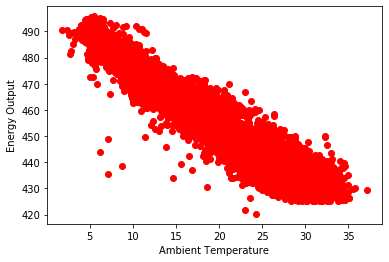

In [32]:
# Plot out the outputs for Ambient Temperature vs. Energy Output 

plt.scatter(X_train[["AT"]], y_train, color='red')
plt.xlabel('Ambient Temperature')
plt.ylabel('Energy Output')
plt.show()

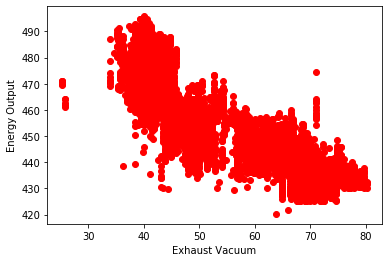

In [34]:
# Plot the outputs for Exhaust Vacuum (V) and Energy Output

plt.scatter(X_train[["V"]], y_train, color='red')
plt.xlabel('Exhaust Vacuum')
plt.ylabel('Energy Output')
plt.show()

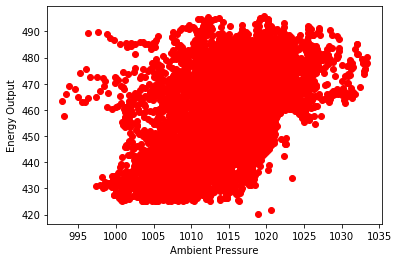

In [35]:
# Plot the outputs for Ambient Pressure (AP) and Energy Output

plt.scatter(X_train[["AP"]], y_train, color='red')
plt.xlabel('Ambient Pressure')
plt.ylabel('Energy Output')
plt.show()

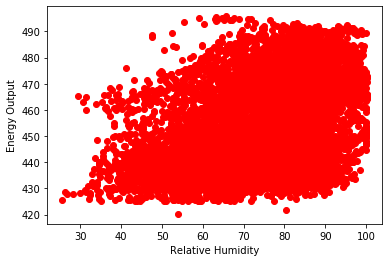

In [36]:
# Plot the outputs for Relative Humidity (RH) and Energy Output

plt.scatter(X_train[["RH"]], y_train, color='red')
plt.xlabel('Relative Humidity')
plt.ylabel('Energy Output')
plt.show()

# Linear Regression

In [0]:
# Create linear regression object
regression = linear_model.LinearRegression()

In [38]:
# Train the model using the training sets
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Make predictions using the testing set
y_pred = regression.predict(X_test)

In [40]:
# Looking at coefficients
print("Coefficients: \n", regression.coef_)

Coefficients: 
 [[-1.97696596 -0.23476882  0.05825298 -0.15814574]]


In [43]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 19.61


In [44]:
# Remember, on variance scores: 1 is a perfect prediction
print("Variance score: %.2f" % r2_score(y_test, y_pred))

Variance score: 0.93


In [45]:
X_test.head()

,AT,V,AP,RH
2513,29.70,57.35,1005.63,57.35
9411,25.71,71.64,1008.85,77.31
8745,17.83,44.92,1025.04,70.58
9085,9.46,41.40,1026.78,87.58
4950,29.90,64.79,1016.90,48.24


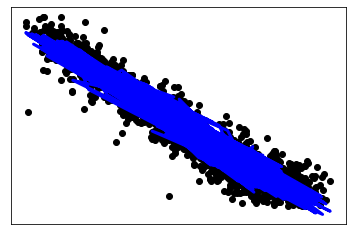

In [46]:
# Plot outputs
plt.scatter(X_test[["AT"]], y_test, color='black')
plt.plot(X_test[["AT"]], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Analysis:

### Scatter Plot Relationships
Very clear linear dependencies between the energy output and the Ambient Temperature (AT).  As AT increases, the energy output (EP) decreases.

For Exhaust Vacuum (V) and energy output, we can see that there was still a visible negative linear correlation.  But it was not as strong as the relationship between AT and EP.  

Plotting Ambient Pressure (AP) and EP, and see that the relationship is not that linear.

Relative Humidity (RH) and EP does not have a linear relationship, but we can see that there is a clear line where as RH increases, EP does as well.

These are supported by the results of the coefficients: a high negative value for AT, and low negative values for V and RH.  There is a positive coefficient for AP.

### Mean Squared Error Variance score

MSE is relatively low. 

Our Variance Score is 0.93, which is really good.  

### Plotting against y_pred

Plotting against the prediction, we can see that we have overlaps, but it isn't completely neat.

But we can get an idea that we are making a good prediction even by a cursory look at the graph.